In [1]:
from tqdm import tqdm 
import numpy as np

from sempler.generators import dag_avg_deg
from sempler import LGANM
from numpy.random import laplace

import ges
from our_utils import *

import matplotlib.pyplot as plt

from noisy_causal_discovery import *

In [2]:
# setting experimental parameters
trials = 100
avg_deg = 2
err_lvl = 0.05
p_add = 0.01
no_graphs = 10
delta = 0.5


# setting dimension and sample increments
d_inc = 5
n_inc = 50

#initializing results matrix
results_rand = np.zeros((4, 5))

In [3]:
eps = 0.02

for d_iter in range(results_rand.shape[0]):
    for n_iter in range(results_rand.shape[1]):

        if results_rand[d_iter, n_iter] != 0:
            continue

        d, n = d_inc * (d_iter+1), n_inc * (n_iter+1)

        err_lvl_adj = alpha_tilde(err_lvl, eps, n)

        for trial in tqdm(range(trials)):
            np.random.seed(trial)
            
            G = np.zeros((d,d))
            data = LGANM(G, (0,0), (1,1)).sample(n=n)
            
            G_options = generate_graphs(G, no_graphs, 0, p_add)
            
            sensitivity = get_sensitivity(data, G_options, delta=delta)
            noise_lvl = noise_scale(eps, sensitivity)
            noisy_scores = [score(data, G_options[j], delta=delta) + laplace(scale=noise_lvl) for j in range(no_graphs)]
            stable_G_est = G_options[np.argmin(noisy_scores)]
            
            results_rand[d_iter, n_iter] += (1-is_valid_empty(data, stable_G_est, err_lvl_adj, G))

        results_rand[d_iter, n_iter] /= trials
        print("eps, d, n=", eps, d, n, ", metrics=", results_rand[d_iter, n_iter])

100%|██████████| 100/100 [00:18<00:00,  5.53it/s]


eps, d, n= 0.02 5 50 , metrics= 0.02


100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


eps, d, n= 0.02 5 100 , metrics= 0.03


100%|██████████| 100/100 [00:17<00:00,  5.74it/s]


eps, d, n= 0.02 5 150 , metrics= 0.02


100%|██████████| 100/100 [00:16<00:00,  6.17it/s]


eps, d, n= 0.02 5 200 , metrics= 0.03


100%|██████████| 100/100 [00:16<00:00,  6.01it/s]


eps, d, n= 0.02 5 250 , metrics= 0.03


100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


eps, d, n= 0.02 10 50 , metrics= 0.05


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


eps, d, n= 0.02 10 100 , metrics= 0.03


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


eps, d, n= 0.02 10 150 , metrics= 0.01


100%|██████████| 100/100 [00:20<00:00,  4.80it/s]


eps, d, n= 0.02 10 200 , metrics= 0.04


100%|██████████| 100/100 [00:21<00:00,  4.64it/s]


eps, d, n= 0.02 10 250 , metrics= 0.02


100%|██████████| 100/100 [00:33<00:00,  2.95it/s]


eps, d, n= 0.02 15 50 , metrics= 0.03


100%|██████████| 100/100 [00:31<00:00,  3.18it/s]


eps, d, n= 0.02 15 100 , metrics= 0.02


100%|██████████| 100/100 [00:32<00:00,  3.11it/s]


eps, d, n= 0.02 15 150 , metrics= 0.06


100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


eps, d, n= 0.02 15 200 , metrics= 0.03


100%|██████████| 100/100 [00:31<00:00,  3.18it/s]


eps, d, n= 0.02 15 250 , metrics= 0.01


100%|██████████| 100/100 [00:58<00:00,  1.70it/s]


eps, d, n= 0.02 20 50 , metrics= 0.07


100%|██████████| 100/100 [00:59<00:00,  1.69it/s]


eps, d, n= 0.02 20 100 , metrics= 0.05


100%|██████████| 100/100 [00:59<00:00,  1.67it/s]


eps, d, n= 0.02 20 150 , metrics= 0.05


100%|██████████| 100/100 [00:58<00:00,  1.72it/s]


eps, d, n= 0.02 20 200 , metrics= 0.02


100%|██████████| 100/100 [00:54<00:00,  1.84it/s]

eps, d, n= 0.02 20 250 , metrics= 0.05


In [4]:
d_list = (np.arange(4)+1)*d_inc
n_list = (np.arange(5)+1)*n_inc

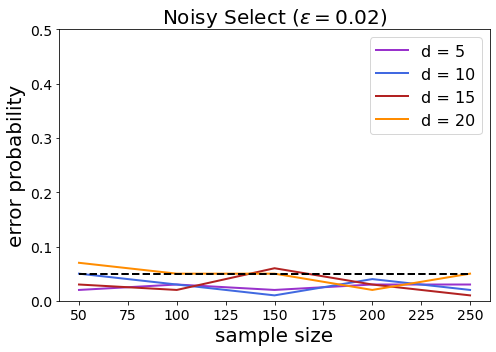

In [5]:
plt.figure(figsize=(7, 5))
colors=['darkorchid', 'royalblue', 'firebrick', 'darkorange', 'forestgreen']
for d_iter in range(4):
    d = d_inc * (d_iter+1)
    plt.plot(n_list, results_rand[d_iter], color=colors[d_iter], label="d = " + str(d), linewidth=2)
plt.plot(n_list, err_lvl*np.ones(5), '--', color="black", linewidth=2)
plt.xlabel("sample size", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("error probability", fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.title("Noisy Select ($\epsilon = 0.02$)", fontsize=20)
plt.ylim((0.0, 0.5))
plt.tight_layout();